In [1]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

본실험 시퀀스1(200915) 팁 면적 측정 (Carbon imprint) 결과값

In [3]:
x = np.array([60    , 360   , 480   , 600   , 720   , 780   , 840   , 900   , 1020  , 1140 , 1200 ])-60
y = np.array([10.56 , 13.82 , 14.70 , 15.59 , 16.71 , 16.63 , 17.37 , 17.94 , 18.44 , 19.60, 20.41])
x

array([   0,  300,  420,  540,  660,  720,  780,  840,  960, 1080, 1140])

In [4]:
np.int(x)

TypeError: only size-1 arrays can be converted to Python scalars

In [5]:
Measure = pd.DataFrame(data=[x,y])
Measure


,0,1,2,3,4,5,6,7,8,9,10
0,0.00,300.00,420.0,540.00,660.00,720.00,780.00,840.00,960.00,1080.0,1140.00
1,10.56,13.82,14.7,15.59,16.71,16.63,17.37,17.94,18.44,19.6,20.41


In [6]:
plt.scatter(x, y, marker='o')
plt.grid()
plt.show()

# Fitting 방법 1 : Sklearn linear regression
### * 피어슨 계수 및 r-squared 값 등 계산 용이

In [7]:
from sklearn.linear_model import LinearRegression

피어슨 상관계수 출력

In [8]:
# 데이터프레임 형태로 변환해야 함
X  = pd.DataFrame(x)
Y  = pd.DataFrame(y)
XY = pd.DataFrame(np.concatenate([X, Y], axis=1))

print(XY.corr(method='pearson'))

          0         1
0  1.000000  0.994748
1  0.994748  1.000000


In [9]:
line_fitter = LinearRegression()
line_fitter.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
x.reshape(-1, 1)

array([[   0],
       [ 300],
       [ 420],
       [ 540],
       [ 660],
       [ 720],
       [ 780],
       [ 840],
       [ 960],
       [1080],
       [1140]])

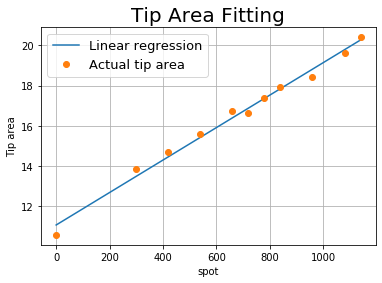

In [27]:
plt.plot(x,line_fitter.predict(x.reshape(-1,1)), label='Linear regression')
plt.plot(x, y, 'o', label='Actual tip area')

plt.legend(fontsize=13)
plt.title('Tip Area Fitting', fontsize=20)
plt.xlabel('spot')
plt.ylabel('Tip area')
plt.grid()
plt.show()

R-squared 값 출력

In [26]:
predict_y = line_fitter.predict(x.reshape(-1,1))
predict_data = pd.DataFrame([y, predict_y])
predict_data = predict_data.transpose()

print(predict_data.corr(method='pearson') ** 2)

          0         1
0  1.000000  0.989524
1  0.989524  1.000000


In [10]:
EverySpots = np.arange(1,1201)
PredictedTipArea = line_fitter.predict(EverySpots.reshape(-1,1))
Result = pd.DataFrame(data = [EverySpots, PredictedTipArea]).transpose()

Result

,0,1
0,1.0,11.063018
1,2.0,11.071104
2,3.0,11.079191
3,4.0,11.087278
4,5.0,11.095365
...,...,...
1195,1196.0,20.726739
1196,1197.0,20.734825
1197,1198.0,20.742912
1198,1199.0,20.750999


Shunting Effect 타겟 구간 (팁 면적: 16.5~17.5) 확인

In [11]:
StartPoint = np.where(Result.iloc[:,1].values <= 16.5)[0][-1]+1 #spot 데이터번호 기준
EndPoint   = np.where(Result.iloc[:,1].values >= 17.5)[0][0]+1
print(StartPoint , EndPoint)

673 797


팁 열화 시작구간 확인

In [12]:
TipWearPoint = np.where(Result.iloc[:,1].values <= 19)[0][-1]+1
print(TipWearPoint)

982


In [15]:
SectionRef = pd.DataFrame([StartPoint, EndPoint, TipWearPoint])
SectionRef

,0
0,673
1,797
2,982


In [17]:
SectionRef.to_csv('./Results/Section_Ref.csv', header=None)

# Fitting 방법 2 : Scipy.optimize curve_fit
### * Fitting 할 함수 정의에 용이

In [ ]:
from scipy.optimize import curve_fit

Fitting 할 함수 정의 (1차 함수)

In [ ]:
def func(x, a, b):
    return a*x + b

함수의 계수(popt) 도출

In [ ]:
popt, pcov = curve_fit(func, x, y)
print(popt)
print(pcov)

In [ ]:
plt.scatter(x, y, marker='o')
plt.plot(x, func(x, *popt), color='red', linewidth=2) # fitting curve plotting
plt.legend(['Actual', 'Fitted'], loc=2)
plt.show()

# 방법 1,2 결과비교

In [ ]:
predict_y

In [ ]:
func(x, *popt)

In [ ]:
Fitting1 = pd.DataFrame(predict_y).transpose()
Fitting2 = pd.DataFrame(func(x, *popt)).transpose()
FittedResult = pd.DataFrame([Fitting1 , Fitting2])
FittedResult